# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 593


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = f"https://api.openweathermap.org/data/2.5/weather?units=Imperial&appid={weather_api_key}"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        city_weather = requests.get(city_url).json()
        
        time.sleep(1)

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | hamilton
Processing Record 2 of Set 1 | adamstown
Processing Record 3 of Set 1 | saipan
Processing Record 4 of Set 1 | atafu village
Processing Record 5 of Set 1 | hermanus
Processing Record 6 of Set 1 | 'ohonua
City not found. Skipping...
Processing Record 7 of Set 1 | yeed
Processing Record 8 of Set 1 | talnakh
Processing Record 9 of Set 1 | yellowknife
Processing Record 10 of Set 1 | limoeiro do norte
Processing Record 11 of Set 1 | waitangi
Processing Record 12 of Set 1 | fort bragg
Processing Record 13 of Set 1 | port-aux-francais
Processing Record 14 of Set 1 | west island
Processing Record 15 of Set 1 | holualoa
Processing Record 16 of Set 1 | vredenburg
City not found. Skipping...
Processing Record 17 of Set 1 | qaqortoq
Processing Record 18 of Set 1 | vorgashor
Processing Record 19 of Set 1 | santiago de veraguas
Processing Record 20 of Set 1 | hayma'
City not found. Skipping...
Processi

Processing Record 39 of Set 4 | petropavlovka
Processing Record 40 of Set 4 | wailua homesteads
Processing Record 41 of Set 4 | crane
Processing Record 42 of Set 4 | colonia
Processing Record 43 of Set 4 | tolanaro
Processing Record 44 of Set 4 | bamyan
Processing Record 45 of Set 4 | mount pearl
Processing Record 46 of Set 4 | dawson creek
Processing Record 47 of Set 4 | avarua
Processing Record 48 of Set 4 | villa yapacani
Processing Record 49 of Set 4 | psachna
Processing Record 0 of Set 5 | ola
Processing Record 1 of Set 5 | whyalla stuart
City not found. Skipping...
Processing Record 2 of Set 5 | baruun-urt
Processing Record 3 of Set 5 | gantang
Processing Record 4 of Set 5 | queenstown
Processing Record 5 of Set 5 | kilinochchi
Processing Record 6 of Set 5 | tanda
Processing Record 7 of Set 5 | midvagur
Processing Record 8 of Set 5 | enewetak
Processing Record 9 of Set 5 | coracora
Processing Record 10 of Set 5 | dailekh
Processing Record 11 of Set 5 | dali
Processing Record 12 o

Processing Record 29 of Set 8 | dalai
Processing Record 30 of Set 8 | sheridan
Processing Record 31 of Set 8 | bawshar
Processing Record 32 of Set 8 | leiyang
Processing Record 33 of Set 8 | ebaye
Processing Record 34 of Set 8 | kharan
Processing Record 35 of Set 8 | magadan
Processing Record 36 of Set 8 | nuuk
Processing Record 37 of Set 8 | samamea
City not found. Skipping...
Processing Record 38 of Set 8 | coquimbo
Processing Record 39 of Set 8 | mubi
Processing Record 40 of Set 8 | kununurra
Processing Record 41 of Set 8 | bintulu
Processing Record 42 of Set 8 | makarov
Processing Record 43 of Set 8 | as sulayyil
Processing Record 44 of Set 8 | dul'durga
Processing Record 45 of Set 8 | oodweyne
Processing Record 46 of Set 8 | chonchi
Processing Record 47 of Set 8 | uliastay
Processing Record 48 of Set 8 | mumford
Processing Record 49 of Set 8 | pitogo
Processing Record 0 of Set 9 | nuku'alofa
Processing Record 1 of Set 9 | yigo village
Processing Record 2 of Set 9 | st. john's
Proc

Processing Record 20 of Set 12 | hasaki
Processing Record 21 of Set 12 | san fernando
Processing Record 22 of Set 12 | tateyama
Processing Record 23 of Set 12 | douz
Processing Record 24 of Set 12 | merowe
Processing Record 25 of Set 12 | kulia village
City not found. Skipping...
Processing Record 26 of Set 12 | skole
Processing Record 27 of Set 12 | luba
Processing Record 28 of Set 12 | harstad
Processing Record 29 of Set 12 | la peca
Processing Record 30 of Set 12 | znamenskoye
Processing Record 31 of Set 12 | vila franca do campo
Processing Record 32 of Set 12 | kavieng
Processing Record 33 of Set 12 | hirara
Processing Record 34 of Set 12 | chabahar
Processing Record 35 of Set 12 | idri
Processing Record 36 of Set 12 | krasnoarmeysk
Processing Record 37 of Set 12 | nagqu
Processing Record 38 of Set 12 | vorkuta
Processing Record 39 of Set 12 | kangding
Processing Record 40 of Set 12 | okhotsk
Processing Record 41 of Set 12 | mariestad
Processing Record 42 of Set 12 | keren
--------

In [7]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          566
Lat           566
Lng           566
Max Temp      566
Humidity      566
Cloudiness    566
Wind Speed    566
Country       566
Date          566
dtype: int64

In [8]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,hamilton,39.1834,-84.5333,63.23,50,0,8.05,US,1682612172
1,adamstown,-25.0660,-130.1015,74.32,70,99,4.56,PN,1682612173
2,saipan,15.1355,145.7010,81.30,89,40,16.11,MP,1682612174
3,atafu village,-8.5421,-172.5159,83.52,74,84,9.57,TK,1682612176
4,hermanus,-34.4187,19.2345,63.81,78,79,10.16,ZA,1682612177


In [10]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [11]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,hamilton,39.1834,-84.5333,63.23,50,0,8.05,US,1682612172
1,adamstown,-25.0660,-130.1015,74.32,70,99,4.56,PN,1682612173
2,saipan,15.1355,145.7010,81.30,89,40,16.11,MP,1682612174
3,atafu village,-8.5421,-172.5159,83.52,74,84,9.57,TK,1682612176
4,hermanus,-34.4187,19.2345,63.81,78,79,10.16,ZA,1682612177


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

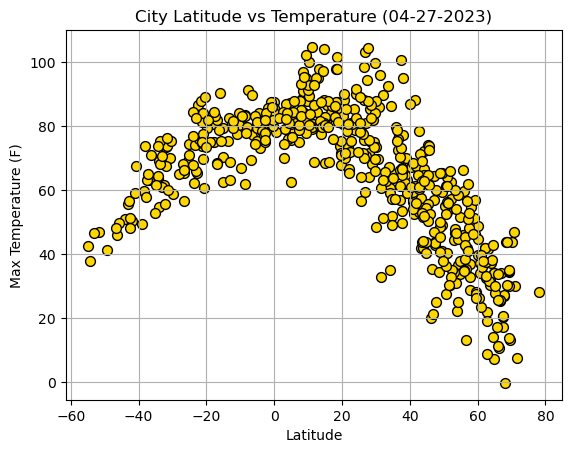

In [13]:
# Build scatter plot for latitude vs. temperature
plt.scatter(
    city_data_df['Lat'],
    city_data_df['Max Temp'],
    color='gold',
    edgecolor='black',
    linewidths=1,
    marker='o',
    label='Cities',
    s=50
)

# Incorporate the other graph properties
plt.title("City Latitude vs Temperature (%s)" % time.strftime("%m-%d-%Y"))
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

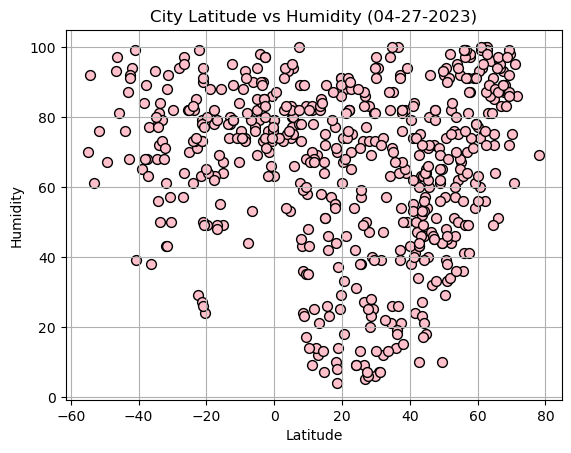

In [15]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(
    city_data_df['Lat'],
    city_data_df['Humidity'],
    color='pink',
    edgecolor='black',
    linewidths=1,
    marker='o',
    label='Cities',
    s=50
)

# Incorporate the other graph properties
plt.title("City Latitude vs Humidity (%s)" % time.strftime("%m-%d-%Y"))
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

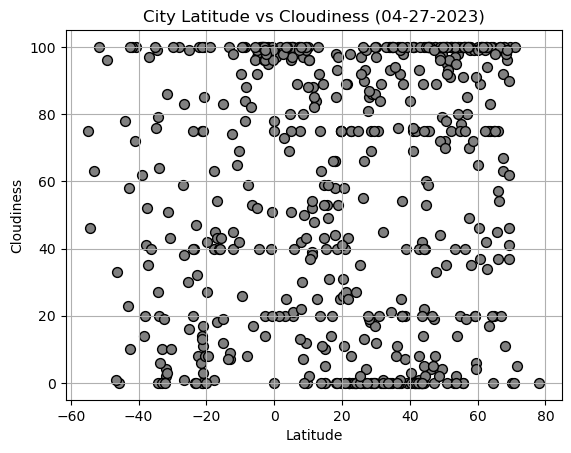

In [17]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(
    city_data_df['Lat'],
    city_data_df['Cloudiness'],
    color='gray',
    edgecolor='black',
    linewidths=1,
    marker='o',
    label='Cities',
    s=50
)

# Incorporate the other graph properties
plt.title("City Latitude vs Cloudiness (%s)" % time.strftime("%m-%d-%Y"))
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid(True)


# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

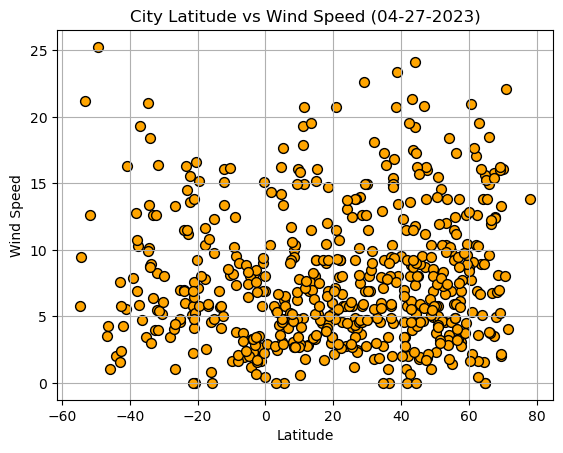

In [19]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(
    city_data_df['Lat'],
    city_data_df['Wind Speed'],
    color='orange',
    edgecolor='black',
    linewidths=1,
    marker='o',
    label='Cities',
    s=50
)

# Incorporate the other graph properties
plt.title("City Latitude vs Wind Speed (%s)" % time.strftime("%m-%d-%Y"))
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [23]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, text_coordinates, color):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    plt.scatter(x_values, y_values, color=color, edgecolor="black", s=50)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=15,color='red')
    plt.xlabel("Latitude")
    plt.ylabel(title)
    print(f"The r-value is: {rvalue**2}")
    plt.show()

In [26]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,hamilton,39.1834,-84.5333,63.23,50,0,8.05,US,1682612172
2,saipan,15.1355,145.7010,81.30,89,40,16.11,MP,1682612174
5,yeed,4.5500,43.0333,87.03,53,80,16.26,SO,1682612179
6,talnakh,69.4865,88.3972,13.21,98,100,2.06,RU,1682612181
7,yellowknife,62.4560,-114.3525,32.56,100,100,12.66,CA,1682612175


In [29]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,adamstown,-25.0660,-130.1015,74.32,70,99,4.56,PN,1682612173
3,atafu village,-8.5421,-172.5159,83.52,74,84,9.57,TK,1682612176
4,hermanus,-34.4187,19.2345,63.81,78,79,10.16,ZA,1682612177
8,limoeiro do norte,-5.1456,-38.0981,80.69,82,92,6.49,BR,1682612183
9,waitangi,-43.9535,-176.5597,50.83,76,78,1.99,NZ,1682612184


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.6322923971315823


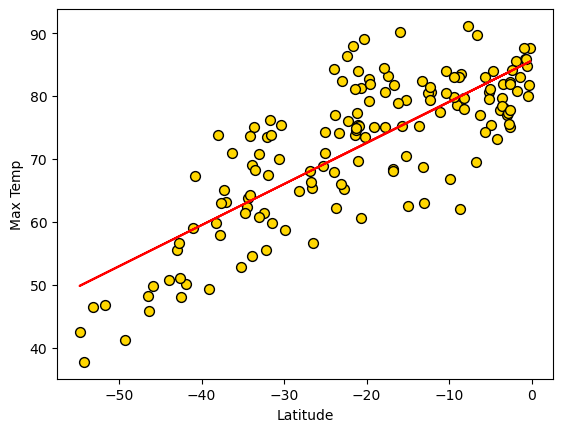

In [31]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, "Max Temp", (6, -10), "gold")

The r-value is: 0.6322923971315823


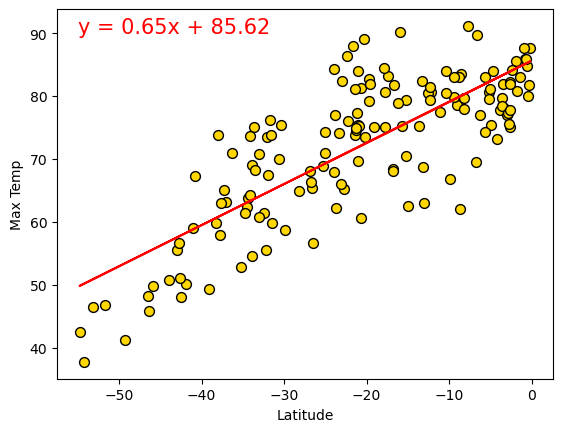

In [32]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, "Max Temp", (-55, 90), "gold")

**Discussion about the linear relationship:** The high r value indicates a strong positive coorelation between latitude and max temp. R values 0.2 indicate that there is a weak positive coorelation in the southern hemisphere (due to the season).

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.006585291455302105


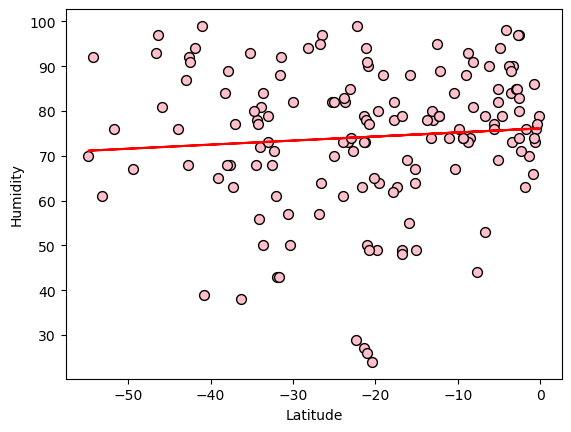

In [36]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, "Humidity", (50,18), "pink")

The r-value is: 0.006585291455302105


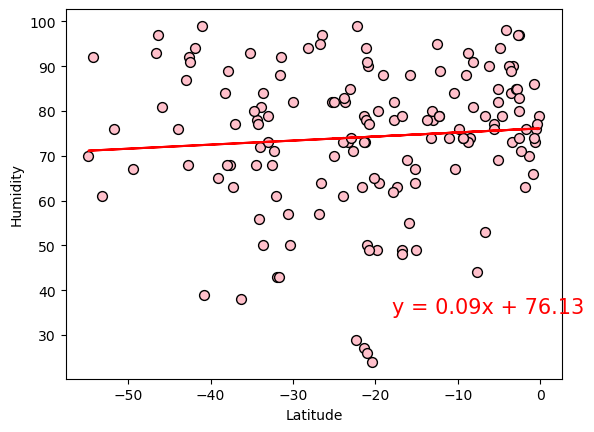

In [37]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, "Humidity", (-18, 35), "pink")

**Discussion about the linear relationship:** The low r vlaues indicate a weak to no relationship between humidity and latitude in both hemispheres.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.059093021849245114


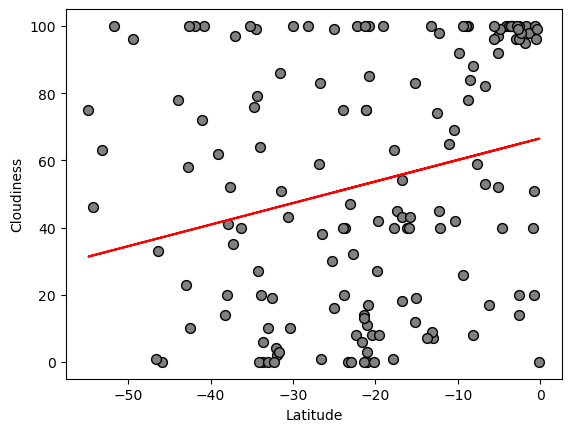

In [38]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, "Cloudiness", (50,50), "gray")

The r-value is: 0.059093021849245114


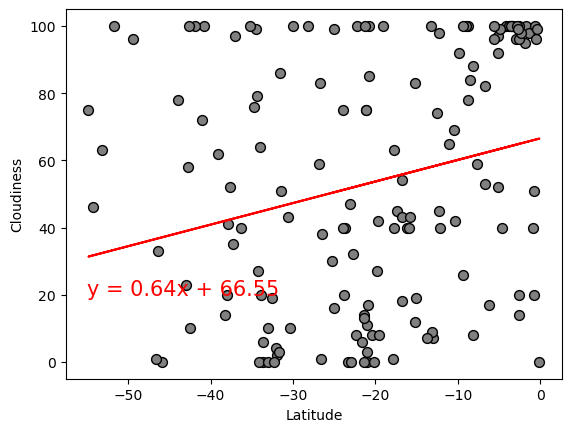

In [40]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, "Cloudiness", (-55, 20), "gray")

**Discussion about the linear relationship:** The low r vlaues indicate a weak to no relationship between cloudiness and latitude in both hemispheres.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.062273580881884255


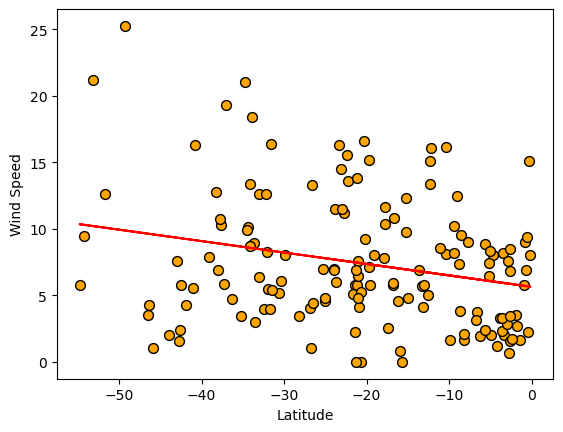

In [41]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, "Wind Speed", (50,35), "orange")

The r-value is: 0.062273580881884255


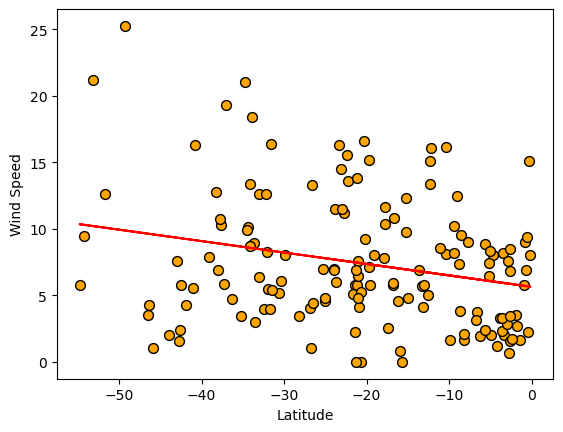

In [43]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, "Wind Speed", (-30, 30), "orange")

**Discussion about the linear relationship:** The low r vlaues indicate a weak to no relationship between wind speed and latitude in both hemispheres.